In [8]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# インポート
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_excel('/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/COVID-19/data/data_covid_fix_name.xlsx')
del df["cumul"]

In [3]:
# 欠損の削除
df.dropna(inplace=True)

df.reset_index(inplace=True)
del df["index"]

In [4]:
df.head()

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
0,Albania,2866376,60.319,13364.155397,6.996524e+06,7.84,8.005411,7.67,70,74.3,1,303.14
1,Algeria,42228429,72.629,15481.787620,9.108277e+06,4.99,5.201489,4.77,58,12.0,1,6442.44
2,Angola,30809762,65.514,6452.355165,1.049012e+07,5.40,5.979936,4.83,83,17.9,1,76.94
3,Argentina,44494502,91.870,20610.568550,1.902562e+07,6.86,8.044600,5.67,65,74.9,1,1516.63
4,Australia,24992369,86.012,51663.365095,7.608913e+06,8.62,9.160533,8.07,26,97.3,1,75667.65


In [29]:
data = df[["pop", "urb", "gdp", "dist", "ef", "pf", "detection", "air"]]
#data["pop"] = np.log(data["pop"])

# 標準化
sc = StandardScaler()
sc.fit(data)
data_std = sc.transform(data)

# 主成分分析

In [30]:
# 主成分分析
pca = PCA(n_components=2)
pca.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
print(pca.components_)

[[ 0.01574305  0.38505076  0.44832296 -0.09010042  0.46848727  0.43566311
   0.4064428   0.26057261]
 [ 0.66708858 -0.26167787 -0.08861959 -0.40399012 -0.04508077 -0.20588224
   0.19289573  0.48355716]]


In [32]:
print('各主成分の分散:{}'.format(pca.explained_variance_))

各主成分の分散:[3.05917208 1.49896976]


In [33]:
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))

各主成分の分散割合:[0.3798472  0.18612208]


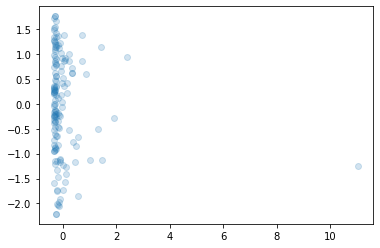

In [34]:
plt.scatter(data_std[:, 0], data_std[:, 1], alpha=0.2)